In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(
    'linear_regression_data.csv'
    , header = None)
pol = None

In [2]:
data.columns = ['x', 'y']

In [3]:
X = np.matrix(data.x.values).T
Y = np.matrix(data.y.values).T

In [4]:
def transform(X, pol = None):
    X2 = X.copy()
    if pol:
        for i in range(pol-1):
            X = np.hstack((X, np.power(X2, i+2)))
    X = np.hstack((np.ones((len(X), 1)), X))
    
    return X

In [5]:
X = transform(X, pol = pol)
X

matrix([[ 1.        ,  0.39293837],
        [ 1.        , -0.42772133],
        [ 1.        , -0.54629709],
        [ 1.        ,  0.10262954],
        [ 1.        ,  0.43893794],
        [ 1.        , -0.15378708],
        [ 1.        ,  0.9615284 ],
        [ 1.        ,  0.36965948],
        [ 1.        , -0.0381362 ],
        [ 1.        , -0.21576496]])

In [6]:
m0 = np.ones((X.shape[1], 1))*0.1
S0 = np.eye(X.shape[1])*0.1
sig0 = 0.1
I = np.eye(X.shape[1])*0.1

In [7]:
import matplotlib.pyplot as plt
X_ = np.matrix(np.linspace(X[:, 1].min(), X[:, 1].max(), 20)).T
X_ = transform(X_, pol)

def graph_plot(ax, A, B, m, S, sig0):
    
    Med = X_ @ m
    Dev = X_ @ S @ X_.T + sig0 * np.eye(len(X_))
    Sup = Med + 2*np.matrix(np.sqrt(np.diag(Dev))).T
    Inf = Med - 2*np.matrix(np.sqrt(np.diag(Dev))).T

    ax.plot(X_[:, 1], Med, color = 'black')
    ax.plot(X_[:, 1], Sup, color = '#bdbdbd')
    ax.plot(X_[:, 1], Inf, color = '#bdbdbd')
    ax.fill_between(
        np.squeeze(np.asarray(X_[:, 1].T)), 
        np.squeeze(np.asarray(Inf.T)), 
        np.squeeze(np.asarray(Sup.T)), 
        color = '#bdbdbd'
    )
    ax.plot(A, B, linestyle = '', marker = 'o')

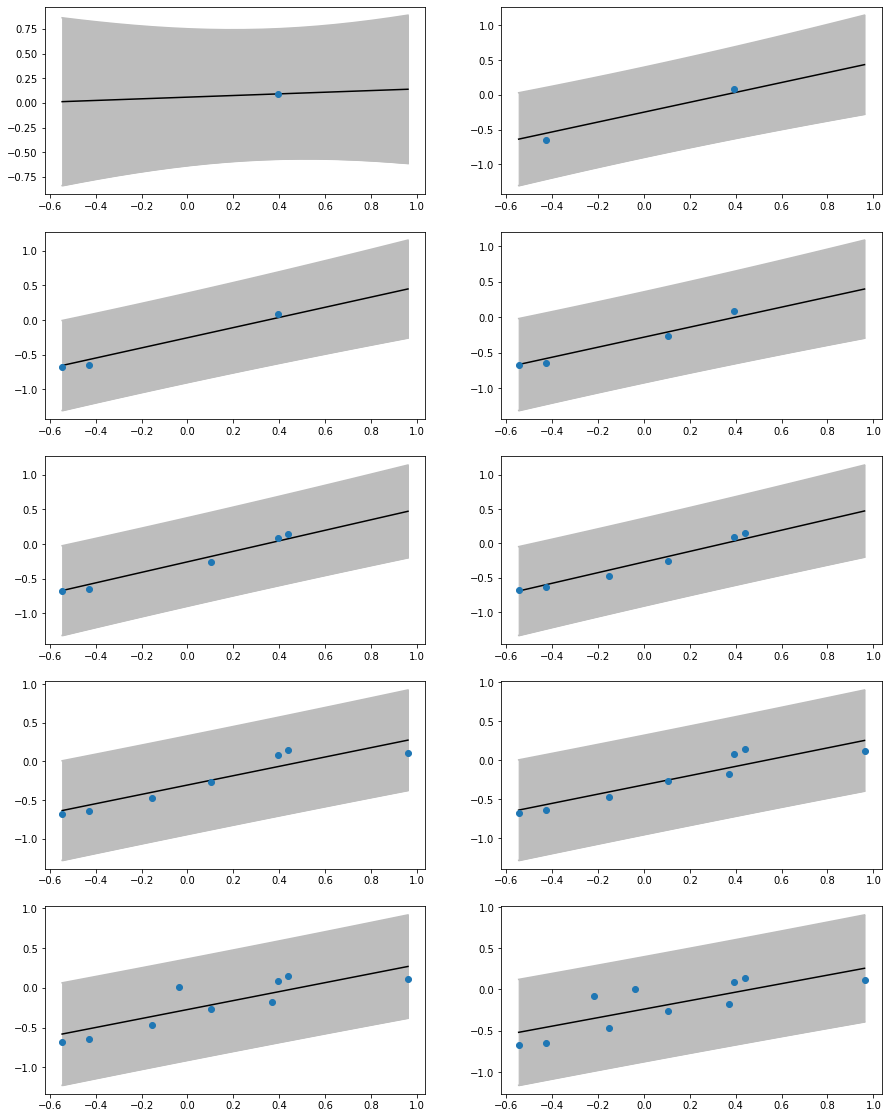

In [8]:
fig, ax = plt.subplots(ncols=2, nrows = len(X) // 2, figsize = [15, 20])
for i in range(len(X)):
    x = X[i, :]
    y = Y[i, :]
    m0 = m0 + np.linalg.pinv(S0 @ x.T @ x + sig0 * I) @ S0 @ x.T @ (y - x @ m0)
    S0 = S0 - np.linalg.pinv(S0 @ x.T @ x + sig0 * I) @ S0 @ x.T @ x @ S0    
    graph_plot(ax[i // 2, i % 2], X[0:(i+1), 1], Y[0:(i+1), 0], m0, S0, sig0)
    
fig.savefig('q1.png')